<a href="https://colab.research.google.com/github/Anelaas/Portfolio/blob/main/Pricing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Machine Learning price optimization is a data-driven approach that leverages historical data on sales, customer behavior,
### and market trends to determine the most effective prices to set. By analyzing data at scale, machine learning algorithms can identify patterns and relationships that are invisible to the human eye, allowing businesses to make informed pricing decisions that drive revenue growth and maximize profits.
###Let’s understand price optimization machine learning with an example for the insurance industry.

In [ ]:
#### Machine Learning Price Optimization Algorithms and Models.

In [ ]:
### Linear Regression: A simple and widely used algorithm that can predict sales based on historical data and external factors such as promotions, seasonality, and competition. It can be used to estimate demand curves and optimize prices based on revenue or profit goals.

### Logistic Regression: Similar to linear regression, but used when the dependent variable is categorical, such as whether or not a customer will purchase a product. It can be used to predict purchase likelihood and optimize prices accordingly.

### Decision Trees: A tree-based algorithm that can identify nonlinear relationships between variables and make predictions based on a series of if-then statements. It can be used to segment customers based on their behavior and optimize prices accordingly.

### Random Forests: A more advanced version of decision trees that uses multiple trees to make predictions and reduce the risk of overfitting. It can be used for customer segmentation and price optimization.

### Neural Networks: A complex algorithm that can learn complex relationships between variables and make predictions based on hidden layers of neurons. It can be used for customer segmentation and price optimization.

In [ ]:
# Retail Price Optimization

# In this project, you will work on the dataset of cafe and deduce the prices of various food items sold at that cafe using past sales data.
# You will learn about Price elasticity and price optimization algorithms like cost-less pricing, perceived value pricing, competition-based pricing, and demand-based pricing.
# You will also get to explore the significance of machine learning algorithms like regression trees and least square method in optimizing prices of various food items. Besides that, the project will also help you polish your data analysis skills.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"]=(10,6) # butun NB boyunca gorseller ayni boyutta olmasi icin

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore") # verilen uyarilan goz ardi edilmesi icin

In [ ]:
#Q: Quantity
#BSRSub: Best Seller Rank (For Relevant Sub Category)
#Rating: Rating level given by customers between 1-5
#Review_Numbers: Total number of reviews the product has received
#P: Price: The purchase price of the product from the USA + the handling fee that OneAMZ intermediate warehouse will receive + the estimated 15% profit of the OneAMZ seller + the average 15% fee that Amazon will receive on the final price.
#R: Revenue: P - (Purchase price of the product from the USA + handling fee that OneAMZ intermediate warehouse will receive + an average of 15% fee that Amazon will receive on the final price)
#QP: It is the product of quantity and price (Q*P) and gives the turnover.
#QP2: Square of Q*P: Since we want to work with a parabolic function in the shape of an inverted U, we also create the second degree value of QP, which is our main explanatory variable, and add it to the model as a separate variable.
#Model: R=β0+β1QP + β2QP2+ β3BSRSub+β4SellerNumbers+β5Rating + β67ReviewNumbers

#The main determinant in this model is: R=β0+β1QP + β2QP2. With this part, we are trying to achieve an image similar to the figure below.#

df = pd.read_excel('/content/Price_Optimsation.xlsx')

In [ ]:
df.head(8)

,Day,Q,BSRSub,Seller_Numbers,Rating,Review_Numbers,P,R,QP,QP2
0,2022-10-01,30,3,1,4.1,5751,103.337653,13.177005,3100.129578,9.610803e+06
1,2022-10-02,29,3,1,4.1,5756,103.337653,13.177005,2996.791925,8.980762e+06
2,2022-10-03,45,3,1,4.1,5768,103.337653,13.177005,4650.194367,2.162431e+07
3,2022-10-04,37,2,1,4.1,5778,103.337653,13.177005,3823.493146,1.461910e+07
4,2022-10-05,35,2,1,4.1,5778,103.337653,13.177005,3616.817841,1.308137e+07
5,2022-10-06,39,1,1,4.1,5796,103.337653,13.177005,4030.168451,1.624226e+07
6,2022-10-07,38,2,1,4.1,5808,103.337653,13.177005,3926.830799,1.542000e+07
7,2022-10-08,24,2,1,4.1,5817,103.337653,13.177005,2480.103662,6.150914e+06


In [ ]:
df.tail(5)

,Day,Q,BSRSub,Seller_Numbers,Rating,Review_Numbers,P,R,QP,QP2
419,2023-11-24,48,2,2,4.2,8885,121.483335,15.490834,5831.200066,3.400289e+07
420,2023-11-25,48,5,2,4.2,8890,121.483335,15.490834,5831.200066,3.400289e+07
421,2023-11-26,47,3,2,4.2,8900,121.483335,15.490834,5709.716731,3.260087e+07
422,2023-11-27,47,2,2,4.2,8873,114.562785,14.608367,5384.450881,2.899231e+07
423,2023-11-28,48,4,2,4.2,8904,114.562785,14.608367,5499.013666,3.023915e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             424 non-null    object 
 1   Q               424 non-null    int64  
 2   BSRSub          424 non-null    int64  
 3   Seller_Numbers  424 non-null    int64  
 4   Rating          424 non-null    float64
 5   Review_Numbers  424 non-null    int64  
 6   P               424 non-null    float64
 7   R               424 non-null    float64
 8   QP              424 non-null    float64
 9   QP2             424 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 33.2+ KB


In [ ]:
df['Day'] = pd.to_datetime(df['Day'], format='%Y/%m/%d')

In [ ]:
df.isnull().sum()

Day               0
Q                 0
BSRSub            0
Seller_Numbers    0
Rating            0
Review_Numbers    0
P                 0
R                 0
QP                0
QP2               0
dtype: int64

In [ ]:
df.shape

(424, 10)

In [ ]:
# Veri setinin duzgun halinin bir yedegini alalim.
df_new = df.copy()

# Bu Exceli disa aktaralim;
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df.describe()

,Q,BSRSub,Seller_Numbers,Rating,Review_Numbers,P,R,QP,QP2
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02
mean,46.509434,2.028302,2.327830,4.163208,7123.775943,109.007411,13.913295,5129.406415,3.035580e+07
std,16.123340,1.808609,1.386725,0.048281,1359.549958,13.401391,1.681042,2013.592941,2.530643e+07
min,14.000000,1.000000,1.000000,4.100000,1571.000000,59.212226,11.074967,1215.940635,1.478512e+06
25%,37.000000,1.000000,1.000000,4.100000,6495.750000,100.569433,12.824018,3835.659473,1.471233e+07
50%,45.000000,1.000000,2.000000,4.200000,7229.500000,113.026423,14.412459,4969.487782,2.469581e+07
75%,54.250000,2.000000,4.000000,4.200000,8121.500000,121.331083,15.471420,6126.946310,3.753976e+07
max,142.000000,17.000000,5.000000,4.200000,8904.000000,132.403963,16.883368,16049.752009,2.575945e+08


In [ ]:
df.corr()

,Q,BSRSub,Seller_Numbers,Rating,Review_Numbers,P,R,QP,QP2
Q,1.000000,-0.299806,0.051407,0.374895,0.230877,0.276173,0.276061,0.958572,0.924403
BSRSub,-0.299806,1.000000,-0.015019,-0.036779,0.050709,-0.165728,-0.172985,-0.297227,-0.182294
Seller_Numbers,0.051407,-0.015019,1.000000,0.187641,0.301857,0.120537,0.114930,0.093571,0.115240
Rating,0.374895,-0.036779,0.187641,1.000000,0.428453,0.587687,0.587019,0.488261,0.417620
Review_Numbers,0.230877,0.050709,0.301857,0.428453,1.000000,0.156528,0.153180,0.270414,0.243435
P,0.276173,-0.165728,0.120537,0.587687,0.156528,1.000000,0.987049,0.522822,0.426837
R,0.276061,-0.172985,0.114930,0.587019,0.153180,0.987049,1.000000,0.519888,0.425883
QP,0.958572,-0.297227,0.093571,0.488261,0.270414,0.522822,0.519888,1.000000,0.954998
QP2,0.924403,-0.182294,0.115240,0.417620,0.243435,0.426837,0.425883,0.954998,1.000000


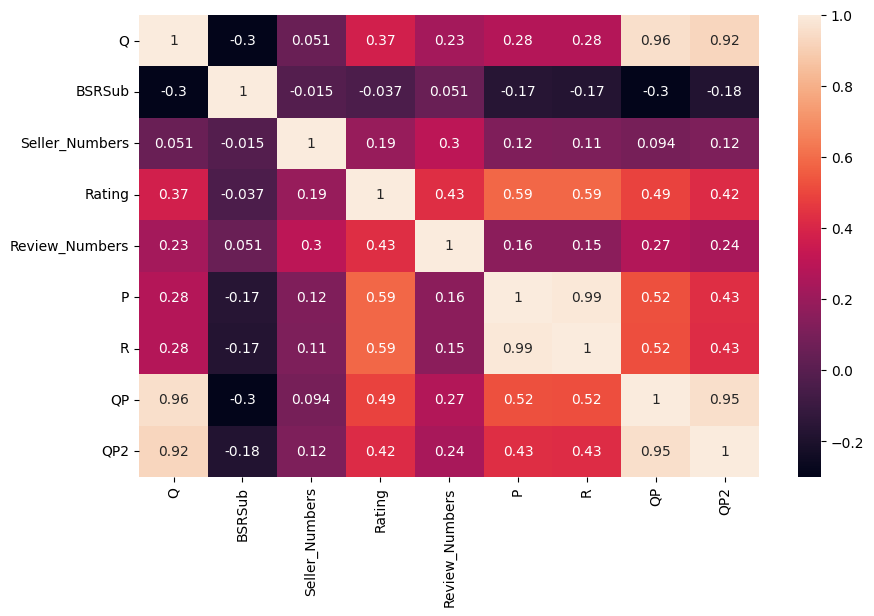

In [ ]:
sns.heatmap(df.corr(), annot = True);

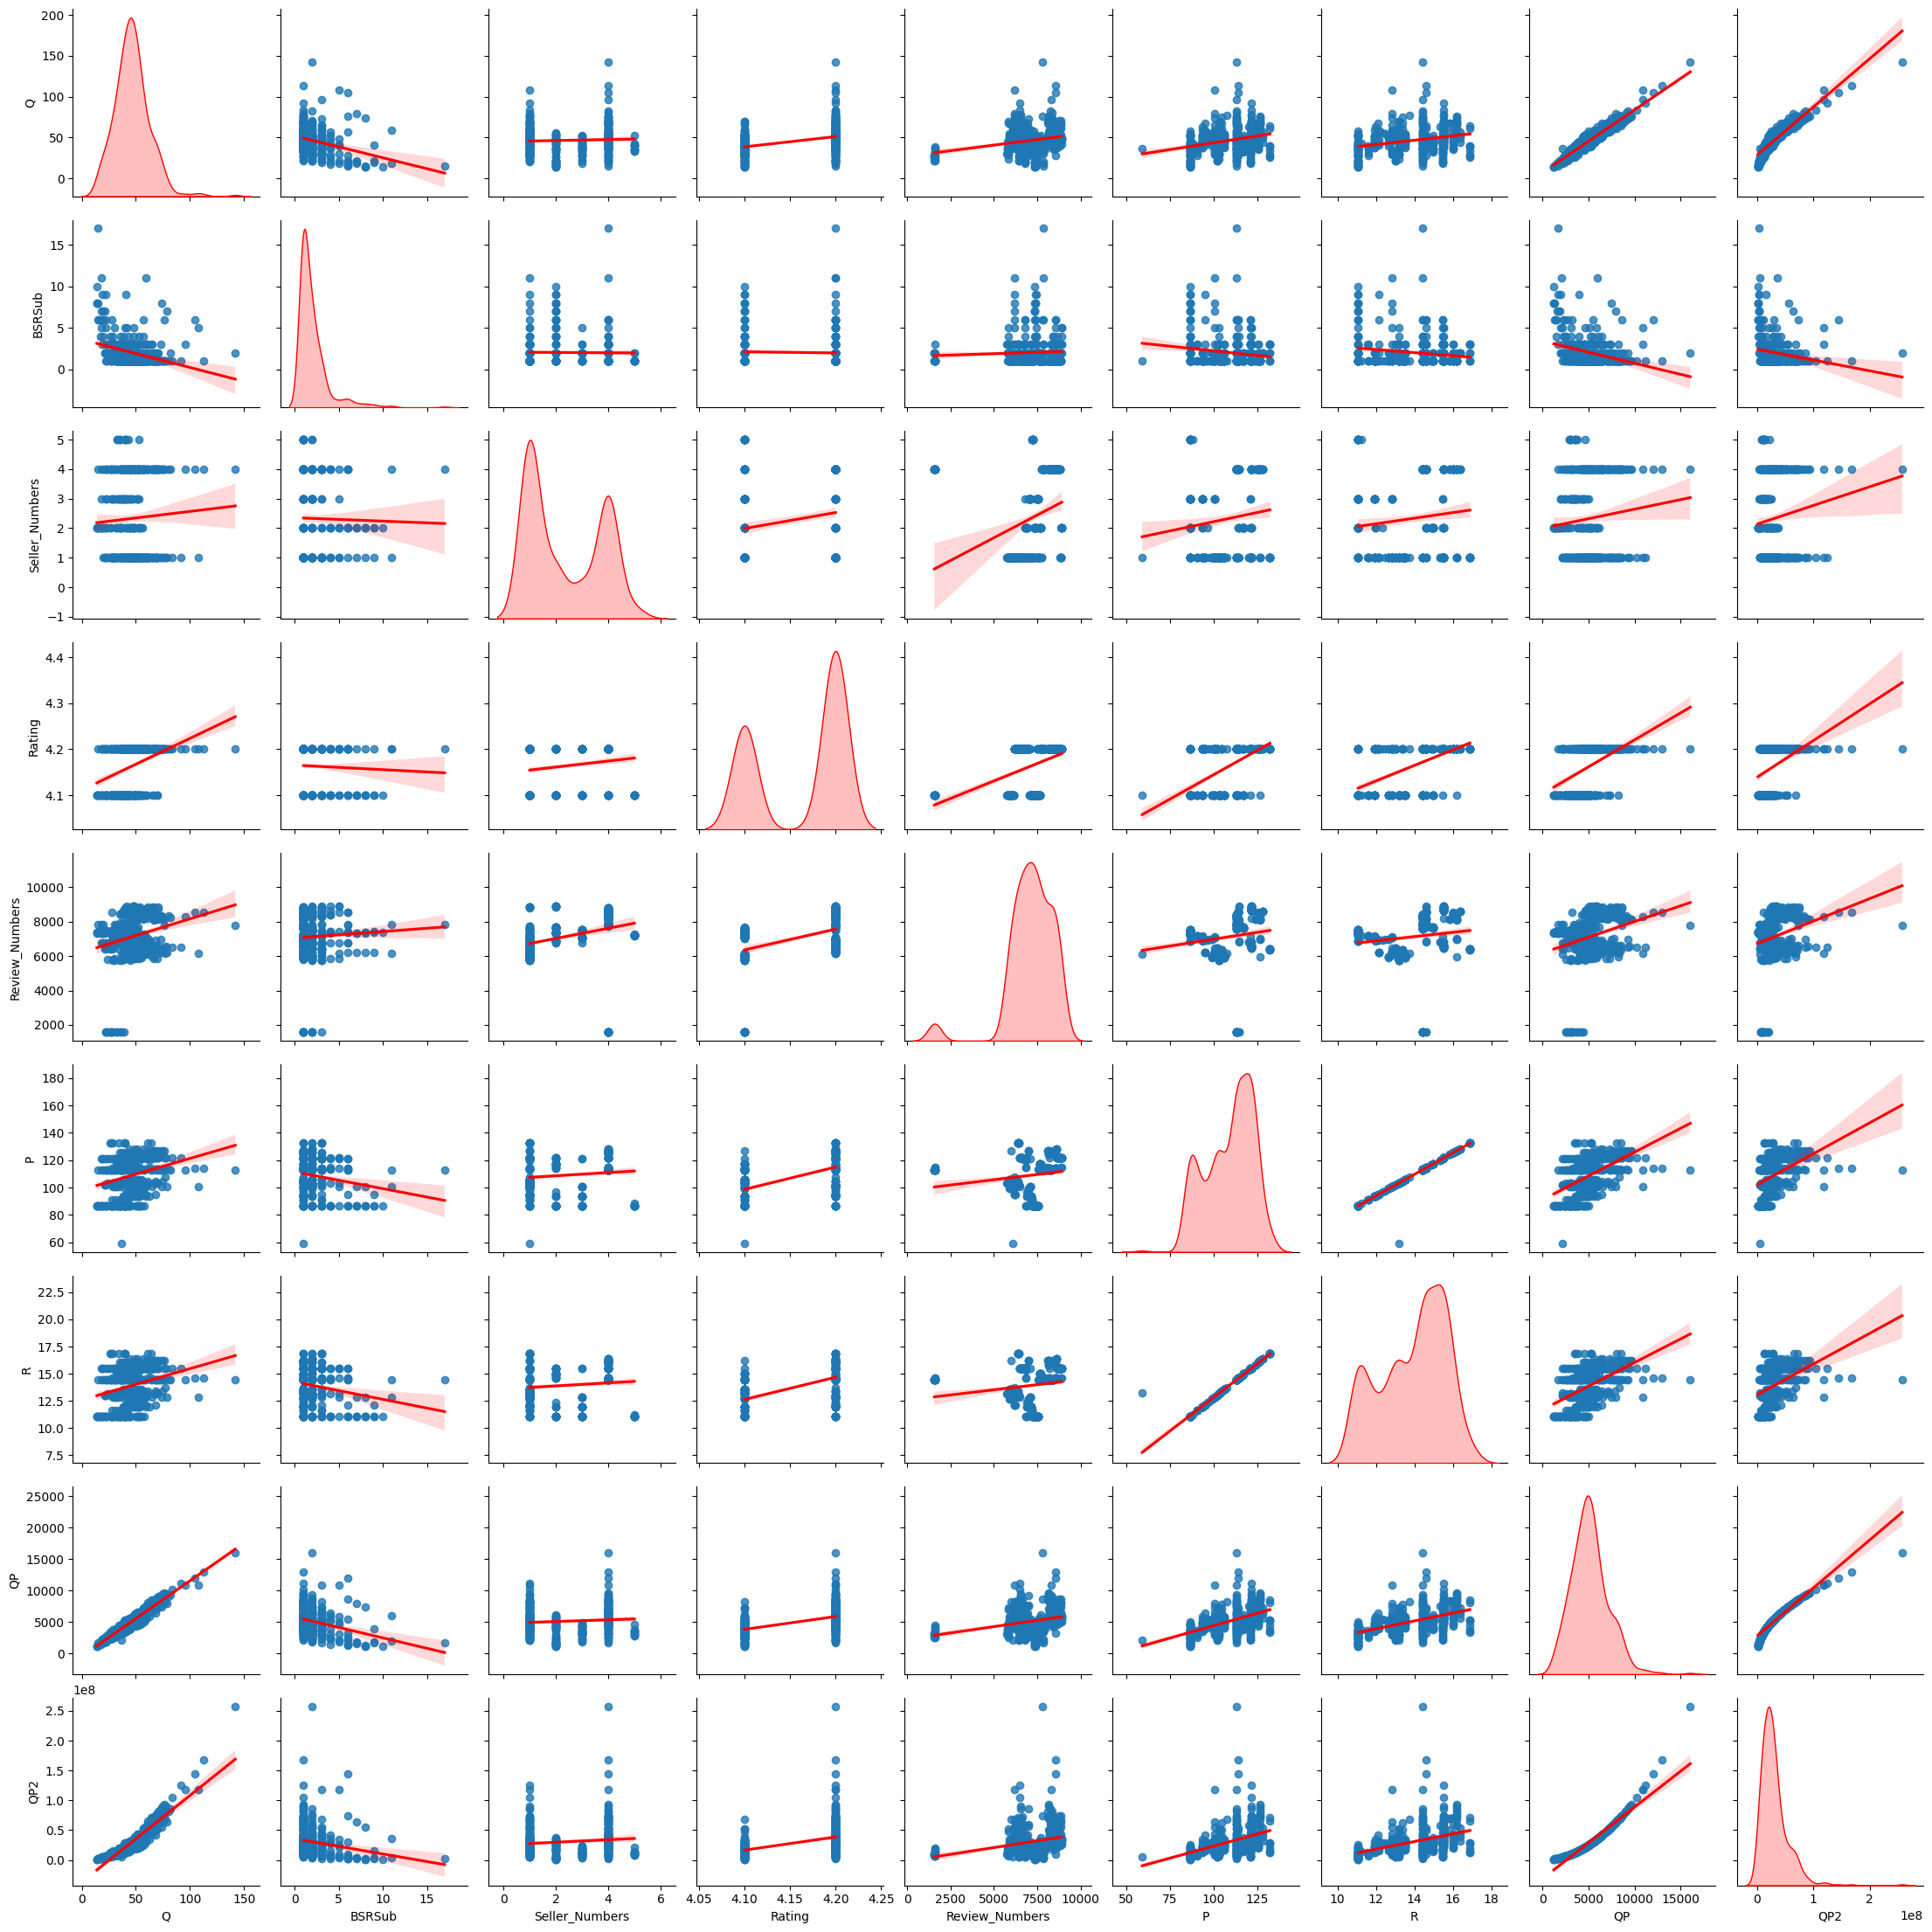

In [ ]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

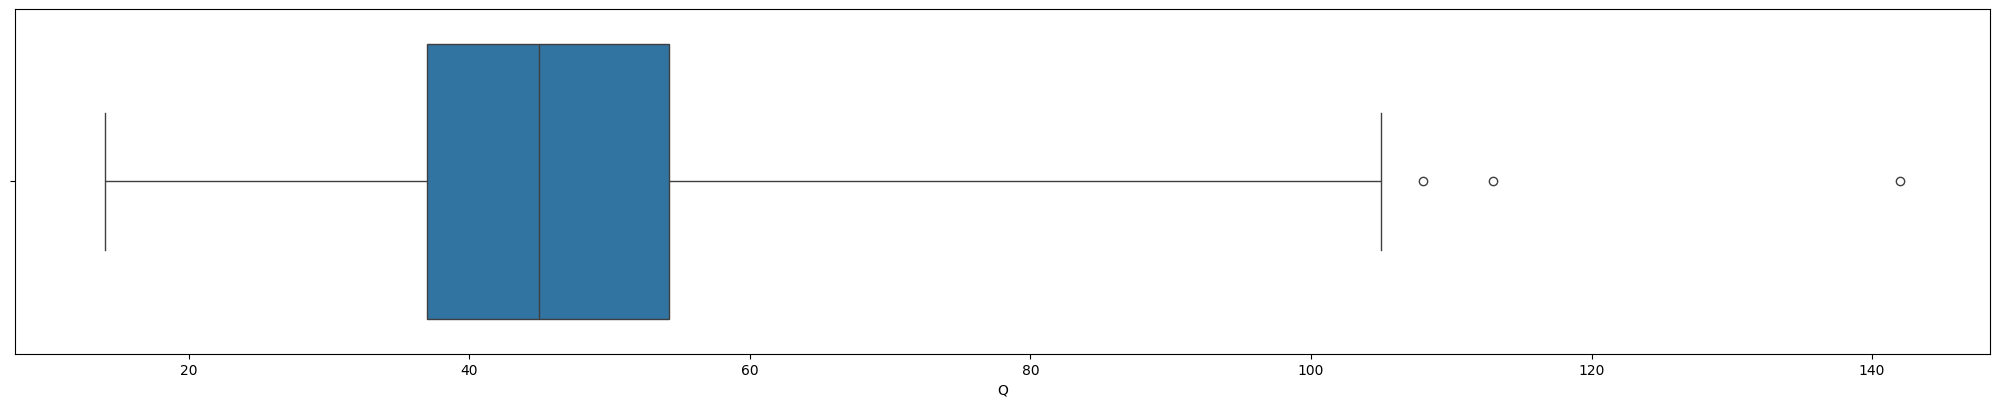

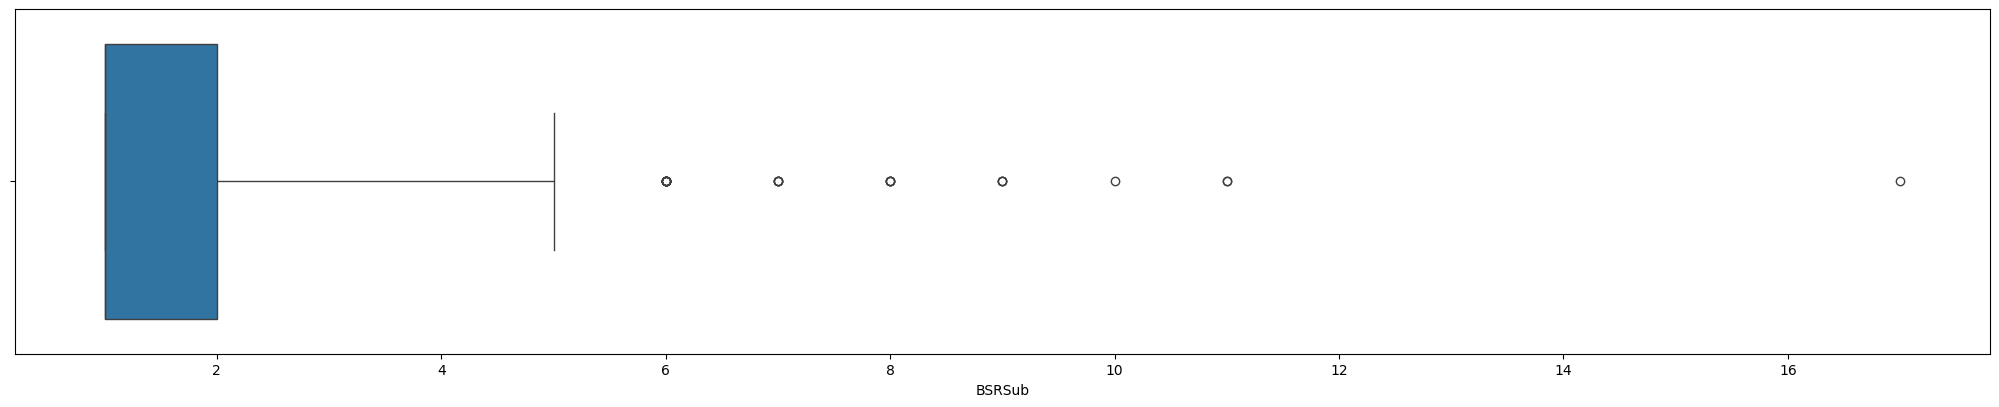

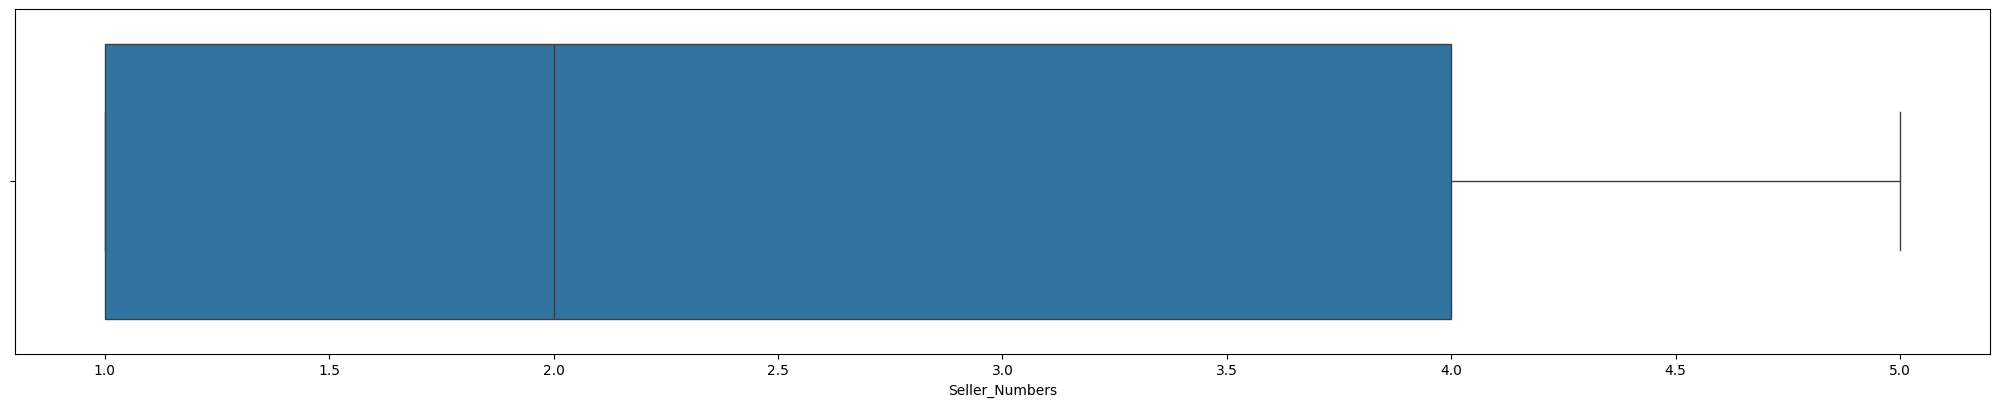

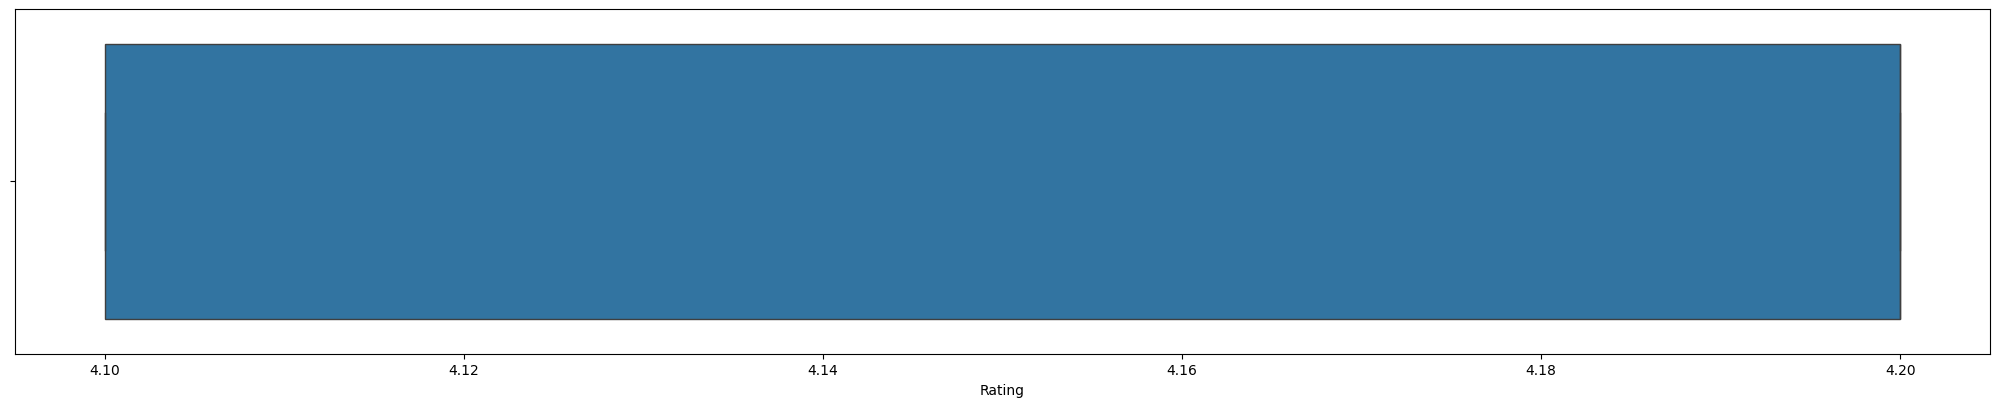

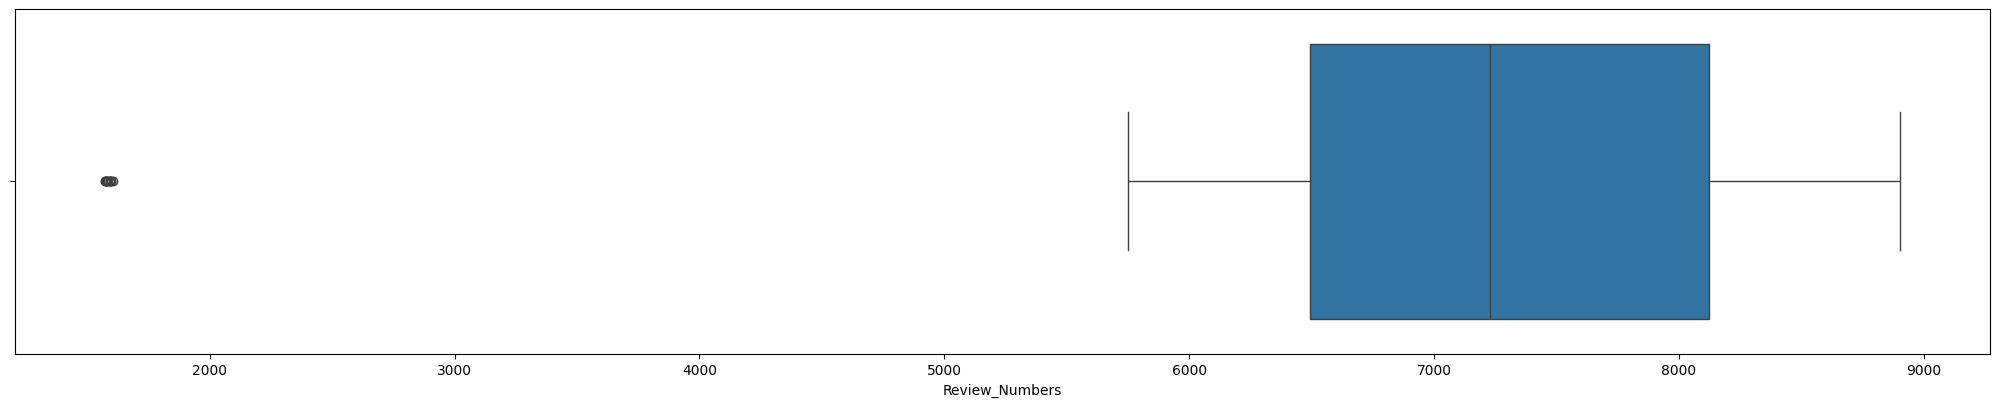

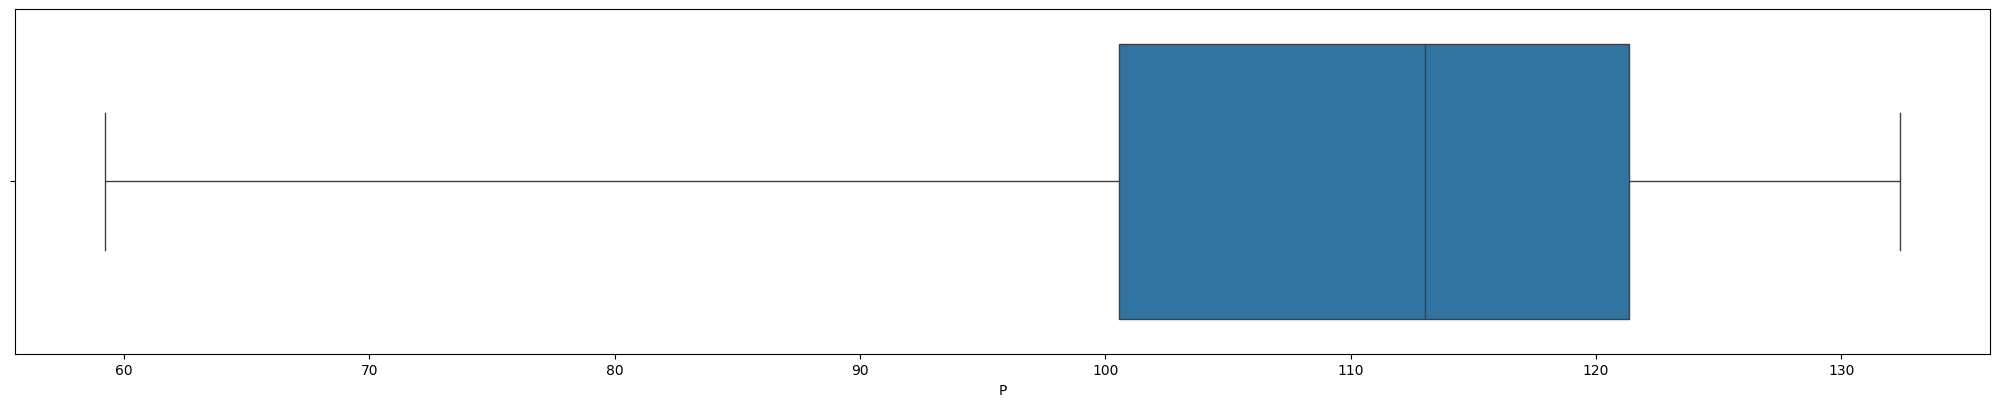

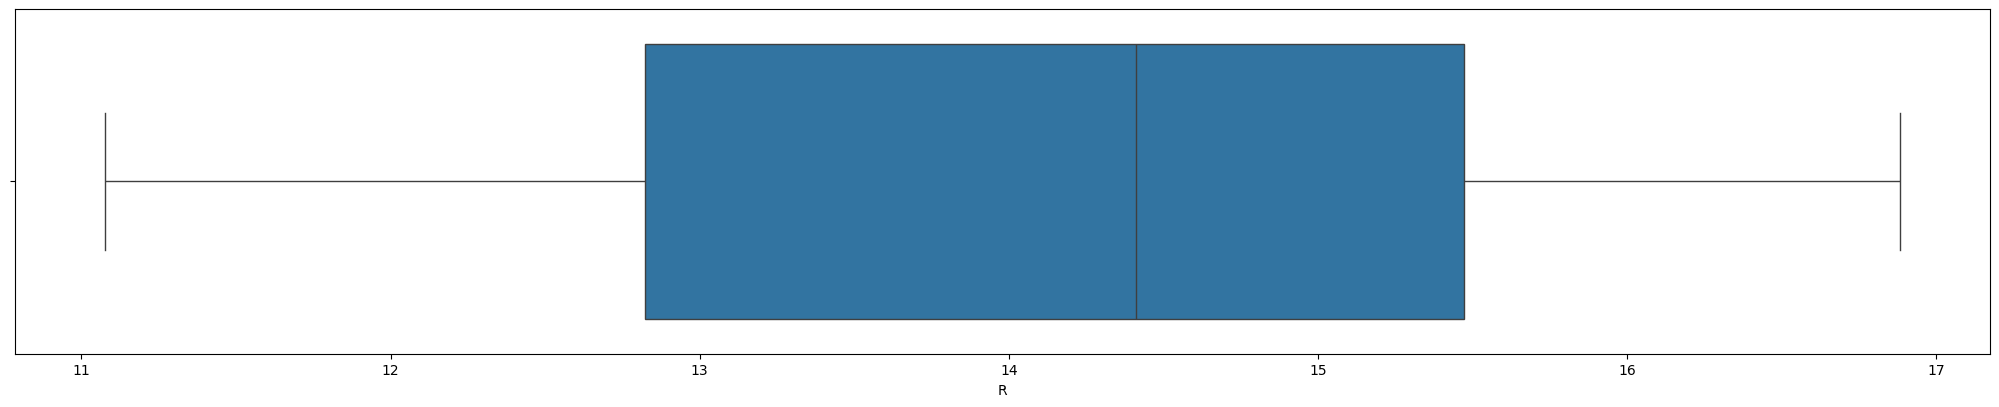

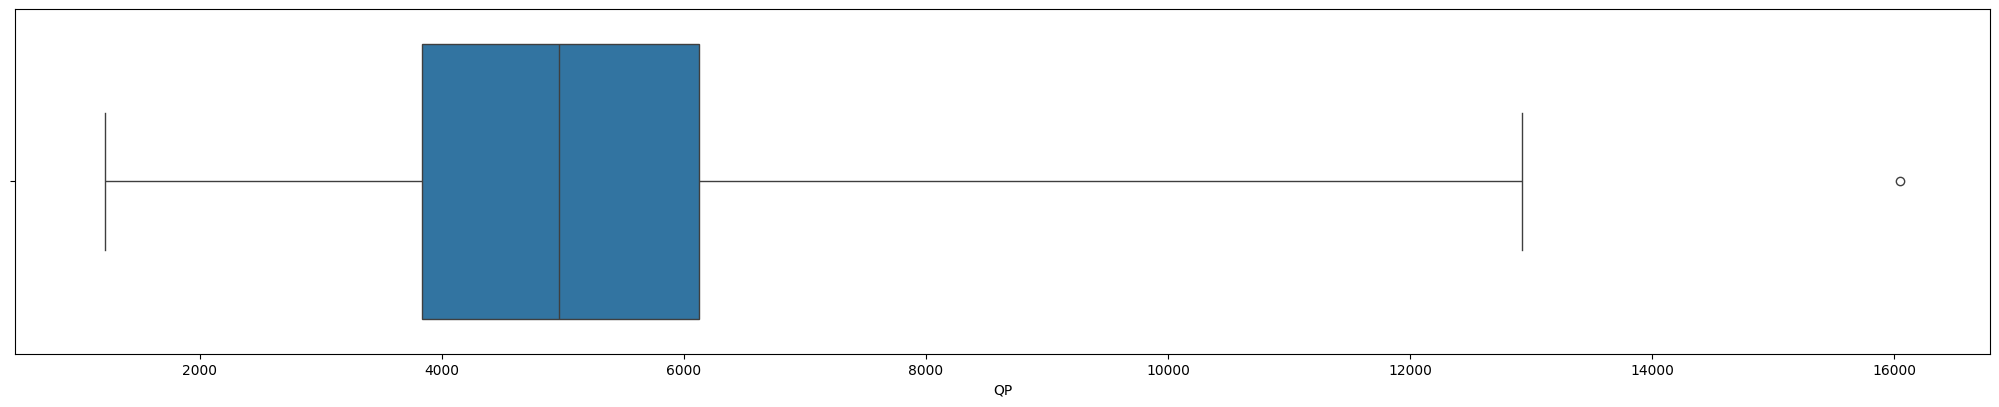

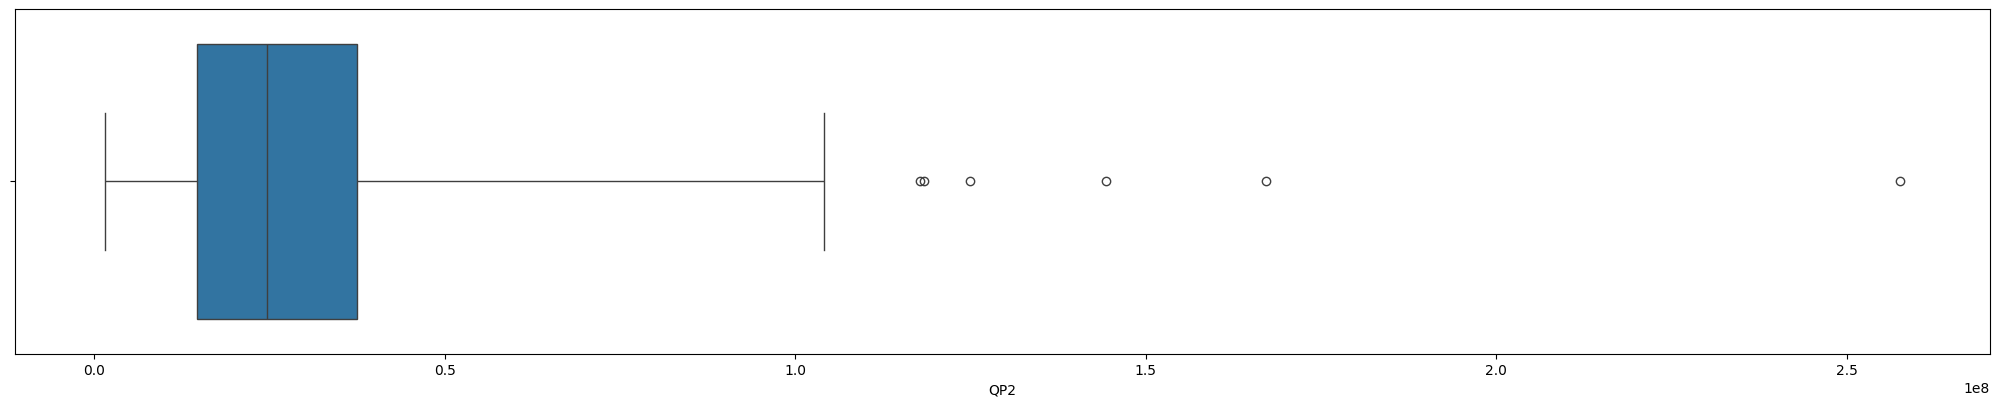

In [ ]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0

for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df, whis=3)

    plt.tight_layout()

    plt.show()


In [ ]:
X = df[["QP", "QP2", "BSRSub", "Seller_Numbers", "Rating", "Review_Numbers"]]
y = df["R"]

In [ ]:
# Split islemi icin gerekli olan kutuphaneyi cagiralim;

from sklearn.model_selection import train_test_split

In [ ]:
# Split train and test values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 6), (85, 6), (339,), (85,))

In [ ]:
### Scaling the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()


In [ ]:
# Standartize the data

scaler.fit(X_train)

StandardScaler()

In [ ]:
# X_trained standarrize the data

X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.37758112, -1.08877887,  1.22887691, -0.98272294,  0.77886781,
        -0.23997012],
       [ 0.24855796,  0.0647056 , -0.59826902, -0.98272294, -1.28391491,
        -0.79712206],
       [-1.52783616, -1.15006037,  0.01077962, -0.98272294,  0.77886781,
        -0.47519626],
       ...,
       [ 0.55565089,  0.38329836, -0.59826902, -0.25692103,  0.77886781,
         0.41240933],
       [ 0.62068567,  0.45487596,  0.61982827,  1.19468279,  0.77886781,
         0.88357226],
       [-0.09771168, -0.25613356, -0.59826902, -0.98272294,  0.77886781,
        -0.37996876]])

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 3.59374143e-01,  1.75980043e-01,  1.07796221e-02,
        -9.82722943e-01,  7.78867814e-01, -1.90224407e-01],
       [-4.54074056e-01, -5.43827779e-01, -5.98269024e-01,
         1.19468279e+00,  7.78867814e-01,  4.72814835e-01],
       [-1.11984501e+00, -9.65814492e-01,  1.07796221e-02,
         4.68880881e-01, -1.28391491e+00, -1.61144235e-02],
       [-1.26169408e-01, -2.80691439e-01,  1.07796221e-02,
         1.19468279e+00,  7.78867814e-01,  1.02214960e+00],
       [ 4.13595284e-01,  2.31944147e-01,  1.83792556e+00,
        -2.56921031e-01,  7.78867814e-01,  1.26377162e+00],
       [ 1.80391682e+00,  2.00782009e+00, -5.98269024e-01,
        -9.82722943e-01,  7.78867814e-01, -5.26363272e-01],
       [-1.24991458e+00, -1.03068821e+00,  2.44697421e+00,
        -2.56921031e-01,  7.78867814e-01, -2.39259463e-01],
       [-1.00915726e-01, -2.58912254e-01, -5.98269024e-01,
        -9.82722943e-01,  7.78867814e-01, -2.26467709e-01],
       [ 1.68471914e+00,  1.82985222e+00, -5.982

MULTIPLE LINEAR REGRESSION

In [49]:


from sklearn.linear_model import LinearRegression


# Eval metrics icin kullanacagimiz kutuphaneyi cagiralim;

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg = LinearRegression()


lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
lin_reg.intercept_  #b0

13.86215872455752

In [45]:

lin_reg.coef_  # b1, b2, b3, b4

# = df[["QP", "QP2", "BSRSub", "Seller_Numbers", "Rating", "Review_Numbers"

array([ 1.71509825, -1.04843623,  0.06215476,  0.16934875,  0.67255485,
       -0.29733035])

In [ ]:
#R = 13.82 + 1.59QP - 1.05QP2 - 6.20BSRSub + 0.13SellerNumber + 0.79Rating - 0.33ReviewNumbers

In [50]:
y_train_pred = lin_reg.predict(X_train_scaled)
y_train_pred

array([13.14612633, 13.39051756, 12.94690325, 14.53257535, 15.04534725,
       15.19405276, 14.66707754, 13.69889886, 12.78899815, 11.59811097,
       12.78885505, 12.97455967, 14.81397883, 14.48978955, 14.66436881,
       12.3742744 , 13.40016369, 14.90046639, 12.54892877, 15.072137  ,
       12.72396893, 13.10292749, 14.39296752, 14.89061403, 12.32504373,
       14.49448073, 14.36083525, 14.66733123, 14.44380224, 14.89159184,
       13.97488512, 15.10350574, 14.9178249 , 14.59183986, 13.10654925,
       11.92062757, 12.42643491, 14.98156586, 14.79177254, 14.39863698,
       14.30845956, 13.09470879, 14.44370509, 14.89370483, 14.24506484,
       14.56796124, 13.64223316, 14.28083104, 14.68516117, 14.71315852,
       14.37092125, 14.14771356, 12.2055018 , 14.53613212, 14.53943138,
       15.16644644, 12.89733637, 12.86248457, 13.91373487, 12.77581008,
       13.05600781, 12.52676121, 14.51525188, 15.29117821, 11.88247134,
       13.81515978, 11.02668061, 12.20389491, 12.87217715, 15.26

In [51]:
# Train Datasi icin eval metricsleri elde edelim;

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    #print("Model testing performance:")
    print("---------------------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

print("Model testing performance for TRAIN DATA:")

### In summary, an R2 score of 0.47 suggests that the linear model explains a moderate amount of the variance in the dependent variable,
## leaving room for improvement but still providing valuable insights into the relationship between the variables.

eval_metric(y_train, y_train_pred)

Model testing performance for TRAIN DATA:
---------------------------------------
R2_score 	: 0.47018331124929236
MAE 		: 0.9684135305993655
MSE 		: 1.4967433954900045
RMSE 		: 1.2234146457722355


All Models

In [53]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

In [55]:

ridge=Ridge().fit(X_train_scaled, y_train)
lasso=Lasso().fit(X_train_scaled, y_train)
enet=ElasticNet().fit(X_train_scaled, y_train)
knn=KNeighborsRegressor().fit(X_train_scaled, y_train)
ada=AdaBoostRegressor().fit(X_train_scaled, y_train)
svm=SVR().fit(X_train_scaled, y_train)
mlpc=MLPRegressor().fit(X_train_scaled, y_train) # Multilayer perceptron. ANN modeli
dtc=DecisionTreeRegressor().fit(X_train_scaled, y_train)
rf=RandomForestRegressor().fit(X_train_scaled, y_train)
xgb=XGBRegressor().fit(X_train_scaled, y_train)
gbm=GradientBoostingRegressor().fit(X_train_scaled, y_train)
lgb=LGBMRegressor().fit(X_train_scaled, y_train) # LightGBM


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 339, number of used features: 6
[LightGBM] [Info] Start training from score 13.862159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [57]:
### Evaluate model performance
models=[ridge,lasso,enet,knn,ada,svm,mlpc,dtc,rf,xgb,gbm,lgb]

def ML(y,models):
    r2_score=models.score(X_train_scaled, y_train)
    return r2_score

In [58]:
for i in models:
     print(i,"Algorithm succed rate :", ML("survived",i))

Ridge() Algorithm succed rate : 0.4697039451570505
Lasso() Algorithm succed rate : 0.0
ElasticNet() Algorithm succed rate : 0.2551588176013899
KNeighborsRegressor() Algorithm succed rate : 0.7876292122778672
AdaBoostRegressor() Algorithm succed rate : 0.8412455660865843
SVR() Algorithm succed rate : 0.6191354497562231
MLPRegressor() Algorithm succed rate : -0.2515360814725689
DecisionTreeRegressor() Algorithm succed rate : 1.0
RandomForestRegressor() Algorithm succed rate : 0.9851936265438518
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_st

In [60]:
# Test performace on test data;
def ML(y,models):
    r2_score=models.score(X_test_scaled, y_test)
    return r2_score

In [61]:
for i in models:
     print(i,"Algorithm succed rate :",ML("survived",i))

Ridge() Algorithm succed rate : 0.4209980186094604
Lasso() Algorithm succed rate : -0.02371050995986712
ElasticNet() Algorithm succed rate : 0.21776812073007745
KNeighborsRegressor() Algorithm succed rate : 0.6774719258390612
AdaBoostRegressor() Algorithm succed rate : 0.7380760330145947
SVR() Algorithm succed rate : 0.6876333091030273
MLPRegressor() Algorithm succed rate : -3.3908681822967646
DecisionTreeRegressor() Algorithm succed rate : 0.8311535354893111
RandomForestRegressor() Algorithm succed rate : 0.8185002696817802
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_oneho

In [ ]:

# Step 2: Clone GitHub Repository
!git clone https://github.com/Anelaas/Portfolio.git

In [ ]:

# Step 3: Navigate to the cloned repository
%cd your_repository

In [ ]:
# Step 5: Commit Changes
!git add .

In [ ]:



!git commit -m "Added new_file.txt"

# Step 6: Push Changes to GitHub
!git push origin main  # or 'master' depending on your branch name

# Note: You might need to provide your GitHub username and password or use SSH authentication.
